#### Importing the libraries

In [1]:
import numpy as np
import warnings
from scipy import stats
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Read data and get the necessary information

In [2]:
data=pd.read_csv("../data/scraped/all_data_scraped.csv")
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8281,https://bafybeihdssjr3ue24hpnucnjw3l37r2ke6p2e...,16711422,394758,10592673,6052956,0,0,0,0,Unavailable for Legal Reasons,no_brand,1
8282,https://infura-ipfs.io/ipfs/QmZPkEqQVgEyCqYUZ6...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
8283,https://gateway.ipfs.io/ipfs/bafybeihdssjr3ue2...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
8284,https://ipfs.io/ipfs/Qmdf2f4pUAU8ZEqs8BV1XLxwz...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [3]:
data.shape

(8286, 12)

In [4]:
data.describe()

,color1,color2,color3,color4,color5,color6,color7,color8,status
count,8.286000e+03,8.286000e+03,8.286000e+03,8.286000e+03,8.286000e+03,8.286000e+03,8.286000e+03,8.286000e+03,8286.000000
mean,1.437683e+07,8.038511e+06,7.823825e+06,7.478821e+06,7.137772e+06,7.286793e+06,7.008668e+06,7.126789e+06,0.693097
std,4.923557e+06,6.466487e+06,5.187508e+06,4.819651e+06,5.300230e+06,5.446531e+06,5.341224e+06,5.301015e+06,0.461237
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.579032e+07,2.104604e+06,3.355443e+06,3.699167e+06,2.040100e+06,2.042402e+06,2.171429e+06,2.315183e+06,0.000000
50%,1.664563e+07,5.675222e+06,6.772810e+06,6.447714e+06,6.975606e+06,6.843892e+06,6.684620e+06,6.772944e+06,1.000000
75%,1.671142e+07,1.566022e+07,1.182826e+07,1.131794e+07,1.131607e+07,1.247599e+07,1.130912e+07,1.150144e+07,1.000000
max,1.677722e+07,1.677722e+07,1.677722e+07,1.677722e+07,1.671168e+07,1.677722e+07,1.671168e+07,1.677722e+07,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         8286 non-null   object
 1   color1      8286 non-null   int64 
 2   color2      8286 non-null   int64 
 3   color3      8286 non-null   int64 
 4   color4      8286 non-null   int64 
 5   color5      8286 non-null   int64 
 6   color6      8286 non-null   int64 
 7   color7      8286 non-null   int64 
 8   color8      8286 non-null   int64 
 9   text        7843 non-null   object
 10  brand_name  8286 non-null   object
 11  status      8286 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 776.9+ KB


#### Null values

In [6]:
data.isnull().any()

URL           False
color1        False
color2        False
color3        False
color4        False
color5        False
color6        False
color7        False
color8        False
text           True
brand_name    False
status        False
dtype: bool

In [7]:
data.isnull().sum()

URL             0
color1          0
color2          0
color3          0
color4          0
color5          0
color6          0
color7          0
color8          0
text          443
brand_name      0
status          0
dtype: int64

In [8]:
#removing null values
data=data.dropna().reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7838,https://bafybeihdssjr3ue24hpnucnjw3l37r2ke6p2e...,16711422,394758,10592673,6052956,0,0,0,0,Unavailable for Legal Reasons,no_brand,1
7839,https://infura-ipfs.io/ipfs/QmZPkEqQVgEyCqYUZ6...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
7840,https://gateway.ipfs.io/ipfs/bafybeihdssjr3ue2...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
7841,https://ipfs.io/ipfs/Qmdf2f4pUAU8ZEqs8BV1XLxwz...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [9]:
data.shape

(7843, 12)

#### class distribution

In [10]:
data['status'].value_counts()

1    5352
0    2491
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

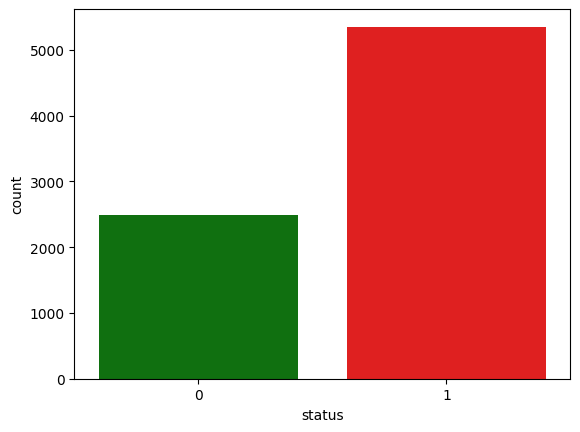

In [11]:
sns.countplot(x=data['status'], palette=['green', 'red'])

#### total unique values for each feature

In [12]:
data.nunique(axis=0,dropna=True)

URL           6346
color1        1467
color2        2752
color3        3172
color4        3353
color5        3479
color6        3466
color7        3467
color8        3444
text          4999
brand_name      14
status           2
dtype: int64

#### duplicated rows

In [13]:
url_dup=data[data.duplicated()]

In [14]:
url_dup

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
1500,http://searchnetworking.techtarget.com/definit...,16316664,5287850,4092812,6776679,3289650,5413524,10461087,13691368,TechTarget Network Unified Communications Mobi...,no_brand,0
1502,http://www.columbusonlineauctions.com/cgi-bin/...,16711422,3818574,5020625,12314107,4671303,14320487,16106820,9763918,Server Error\n\n404\n\nPage Not Found\n\nThis ...,no_brand,0
1503,http://www.zamzar.com/uploadComplete.php?conve...,16382457,15726074,5478882,4030172,2171169,3105214,5481553,6316128,> ZAMZAR° API FORMATS MY FILES CONVERTERS PRIC...,no_brand,0
1504,http://www.1948.org.uk/un-resolution-181/,3946809,6126129,6498870,15000804,10855580,14875854,13949025,9933134,HOME ABOUTUS MAPS GOOGLE EARTH GALLERY SOURCES...,no_brand,0
1507,http://paulbourke.net/geometry/pointlineplane/,16711422,263172,10724259,6250335,197540,15198198,6316229,9276886,"Points, lines, and planes\n\nIn what follows a...",no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7650,http://ybbaw6.webwave.dev/,16711422,394758,10395294,6250335,0,0,0,0,Service At&t Yahoo Mail is not available.\nIf ...,no_brand,1
7655,http://pragativerma18.github.io/facebook-clone/,15461875,4216978,16711422,12757896,6513507,2631720,7116884,1718107,Email or Phone Password\n\nfacebook es\n\nForg...,no_brand,1
7696,http://www.fastcart.co.za/wp-admin/network/sup...,16711422,16185336,2237737,3305303,4747645,14937064,10266797,8694942,CH CREDIT\nAGRICOLE\n\nDécouvrir les nouvelles...,no_brand,1
7744,http://www.eiliashop.com/office365-RD247-RD900/,16119285,11184553,2972313,15790833,15001836,7895160,2303530,11316653,|\n\ni\n\nBE Microsoft\n\nSign in\n\nSIGN IN W...,Microsoft,1


In [15]:
u=url_dup['URL']
u

1500    http://searchnetworking.techtarget.com/definit...
1502    http://www.columbusonlineauctions.com/cgi-bin/...
1503    http://www.zamzar.com/uploadComplete.php?conve...
1504            http://www.1948.org.uk/un-resolution-181/
1507       http://paulbourke.net/geometry/pointlineplane/
                              ...                        
7650                           http://ybbaw6.webwave.dev/
7655      http://pragativerma18.github.io/facebook-clone/
7696    http://www.fastcart.co.za/wp-admin/network/sup...
7744      http://www.eiliashop.com/office365-RD247-RD900/
7804              http://zikooooo2-7ae2d.firebaseapp.com/
Name: URL, Length: 1086, dtype: object

In [16]:
data=data.drop_duplicates(subset='URL', keep="first").reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\n\nV\n\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6341,https://bafybeihdssjr3ue24hpnucnjw3l37r2ke6p2e...,16711422,394758,10592673,6052956,0,0,0,0,Unavailable for Legal Reasons,no_brand,1
6342,https://infura-ipfs.io/ipfs/QmZPkEqQVgEyCqYUZ6...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
6343,https://gateway.ipfs.io/ipfs/bafybeihdssjr3ue2...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1
6344,https://ipfs.io/ipfs/Qmdf2f4pUAU8ZEqs8BV1XLxwz...,16711422,10132122,131586,6052956,0,0,0,0,410 Gone\n\nopenresty,no_brand,1


In [17]:
data.nunique(axis=0,dropna=True)

URL           6346
color1        1432
color2        2709
color3        3110
color4        3276
color5        3410
color6        3401
color7        3402
color8        3374
text          4661
brand_name      14
status           2
dtype: int64

### Work with the 'text' feature

#### Getting the general idea of the type of texts we will be dealing with, since the total unique values in dataset for 'text' is NOT the total rows. Which says that it needs some work.

In [18]:
data.nunique()

URL           6346
color1        1432
color2        2709
color3        3110
color4        3276
color5        3410
color6        3401
color7        3402
color8        3374
text          4661
brand_name      14
status           2
dtype: int64

In [19]:
data['text'].value_counts()

~*\nlORLEN)\n\nSign In\nEmail address\n\nNo account?\n\nEnglish                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [20]:
# created a dataframe to make it look cleaner
ty=pd.DataFrame(data=data['text'].value_counts().sort_values(ascending=False))

In [21]:
# counts=1 means that the web page scraped might be valid and working. so removing those
ty=ty.loc[ty['text'] != 1]

#### Removing texts with counts more than 1. This has been analysed thoroughly, and they really are different types of errors only.

In [22]:
rem_index = []
for i in range(len(ty)):
    common_loc = data.loc[data['text'] == ty.index[i]]
    for j in range(len(data)):
        if data['text'][j] == ty.index[i]:
            rem_index.append(j)
    del common_loc 
len(rem_index)

2097

In [23]:
data=data.drop(labels=rem_index,axis=0)
data=data.reset_index(drop=True)

In [24]:
data.nunique()

URL           4249
color1        1365
color2        2557
color3        2905
color4        3029
color5        3154
color6        3145
color7        3174
color8        3136
text          4249
brand_name      14
status           2
dtype: int64

#### Removing texts with error messages.

In [25]:
bad_pages = []
bad_pattern = r"Site Not Found|This page isn’t working|Internal Server Error|This page isn’t working|Your connection is not private|404"
for i in range(len(data)):
    if re.match(bad_pattern, data['text'][i], flags=re.IGNORECASE):
        bad_pages.append(i)
len(bad_pages)

199

In [26]:
temp = data[data.index.isin(bad_pages)]
temp

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
15,http://galanteriafutrzana.pl/gfx/mail.live-pdf...,16711422,16119543,6448488,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
86,https://admindocusgn11-secondary.z13.web.core....,16711422,16119543,6382696,3699167,10199210,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
215,http://xmlgrid.net/xml2text.html,16711422,16119544,3699167,6448488,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,0
448,https://www.motorzona.ru/,16711422,16119543,6448488,3699167,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,0
522,http://rakuten.co.jp.k3kngroeniu4lkdsbnhoirteh...,16711422,16119543,6382696,3699167,10133673,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4185,https://paylah65.bond/,16711422,16119544,6448232,3699167,10133675,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
4209,https://adn65.websitepro.hosting/swiss/cc.php,16711422,328965,6184542,10592673,0,0,0,0,site not found,no_brand,1
4213,http://poremtracking.site/,16711422,16119543,6448488,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1
4240,https://robert.harmelin.jpmorgan-bh.com/,16711422,16119543,6382696,3699167,10133674,13193023,2171429,8083025,Your connection is not private\n\nAttackers mi...,no_brand,1


In [27]:
temp = temp.reset_index(drop=True)

In [28]:
# Just for info. There indeed is a url with apple as a brand name.
(temp['brand_name']).value_counts()

no_brand    199
Name: brand_name, dtype: int64

In [29]:
data=data.drop(labels=bad_pages,axis=0)
data=data.reset_index(drop=True)

In [30]:
data.shape

(4050, 12)

### Label Balance after removing some failed pages

<AxesSubplot: xlabel='status', ylabel='count'>

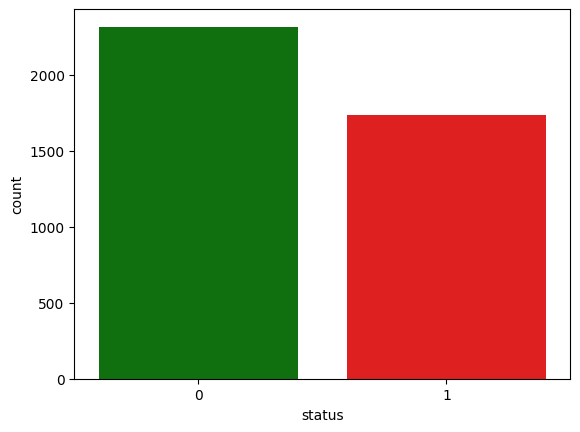

In [31]:
sns.countplot(x=data['status'], palette=['green', 'red'])

### Exploring brand_names col

In [32]:
data['brand_name'].value_counts()

no_brand     3771
Microsoft     188
Amazon         24
Apple          23
AT&T           17
Netflix        11
Intuit          4
Linkedin        4
Zoom            2
DocuSign        2
Xerox           1
Walmart         1
Paypal          1
eFax            1
Name: brand_name, dtype: int64

In [33]:
# looks like there might be some use of this column

In [34]:
one_hot = pd.get_dummies(data.brand_name)

In [35]:
one_hot.head(1)

,AT&T,Amazon,Apple,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax,no_brand
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Adding one hot back to df

In [36]:
data = pd.concat([data, one_hot], axis=1)

In [37]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Intuit,Linkedin,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax,no_brand
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,1


Dropping brand_name col since it is now one hot encoded, dropping no_brand column for redudancy, since 0 on all other brands means no_brand

In [38]:
data = data.drop(['brand_name', 'no_brand'], axis=1)

In [39]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,DocuSign,Intuit,Linkedin,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,0


### Exploring new features based on text

In [40]:
# Website text len
# The intuition is that phishing sites are more to the point hence
# use less chars
data["text_len"] = [len(d) for d in data["text"]]

In [41]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Intuit,Linkedin,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax,text_len
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,856


In [42]:
abs(data.corrwith(data["status"], axis=0))

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_1543/1574653840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(data.corrwith(data["status"], axis=0))


color1       0.127284
color2       0.027640
color3       0.036165
color4       0.053517
color5       0.048330
color6       0.063282
color7       0.096649
color8       0.102326
status       1.000000
AT&T         0.067278
Amazon       0.008331
Apple        0.005665
DocuSign     0.025676
Intuit       0.004550
Linkedin     0.004550
Microsoft    0.188453
Netflix      0.050694
Paypal       0.013605
Walmart      0.018153
Xerox        0.013605
Zoom         0.019243
eFax         0.018153
text_len     0.327306
dtype: float64

### Exploring new features based on URL

In [43]:
from urllib.parse import urlparse

def get_top_level_domain(url):
    tld = urlparse(url)
    return tld.netloc
    
tester = get_top_level_domain('http://daniel.com/wp-content/themes/theretailer/inc/addons/login/customer_center/customer-IDPP00C672/myaccount/signin/?country.x=LU&amp;locale.x=en_LU')

In [44]:
# new feature candidate 1
def get_url_len(url_str):
    return len(url_str)

In [45]:
get_url_len(tester)

10

In [49]:
# new feature candidate 2: Character sequence probability
# This is done using a character bigram model
# tried to make this self documenting
import math
import nltk

def get_url_char_bigram_probs():
    urls = pd.read_csv('../data/links/top-1m.csv', names=['idx', 'URL'])
    urls = urls['URL']
    bg_cnts = {}
    ung_cnts = {}
    # going through each word in the corpus
    for url in urls:
        padding = ' ' # needed for bigram models
        url = padding + url.lower() + padding
        # getting characters
        chars = [c for c in url]
        bgs = nltk.bigrams(chars) # getting bigrams
        
        # adding bigram to counts dictionary
        for bigram in bgs:
            bg_cnts[bigram] = bg_cnts[bigram] + 1 if bigram in bg_cnts else 1
            
        #adding unigram to count dictionary
        for unigram in chars:
            ung_cnts[unigram] = ung_cnts[unigram] + 1 if unigram in ung_cnts else 1
    
    # turning each count into a probability (MLE)
    for k, v in bg_cnts.items():
        first_char, _ = k
        denom = ung_cnts[first_char]
        bg_cnts[k] = v/denom # now it is a conditional probability
        
    # same for unigrams
    norm = sum(ung_cnts.values())
    for k, v in ung_cnts.items():
        ung_cnts[k] = v/norm

    return bg_cnts, ung_cnts
    
bg_probs, ung_probs = get_url_char_bigram_probs()
bg_probs[('e', 'n')] # for example 

0.08001679360316388

In [50]:
def get_score(ung_probs, bg_probs, url_str):
    url_chars = [c for c in url_str]
    url_bgs = nltk.bigrams(url_chars)
    
    # getting a score of each url char bigram
    score = 0
    for bigram in url_bgs:
        # using linear interpolatation smoothing in negative log space to prevent underflow (lambda 0.5)
        first_word, _ = bigram
        score += 0.5*bg_probs.get(bigram, 0) + 0.5*ung_probs.get(first_word, 0)
        # TODO probably should do entropy here
    return score
get_score(ung_probs, bg_probs, tester)

1.2528667881683893

In [52]:
bg_probs, ung_probs = get_url_char_bigram_probs()

url_lens = []
url_scores = []
for url in data['URL']:
    tld = get_top_level_domain(url)
    l = get_url_len(tld)
    score = get_score(ung_probs, bg_probs, tld)
    url_lens.append(l)
    url_scores.append(score)

In [53]:
# adding new features to data
data['url_len'] = url_lens
data['tld_char_score'] = url_scores

In [54]:
data.head(2)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax,text_len,url_len,tld_char_score
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,856,17,1.440488
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,...,0,0,0,0,0,0,0,123,23,2.226029


In [55]:
# splitting for corr checking

In [56]:
y = data['status']
X = data.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Checking correlations between features

In [57]:
abs(X_train.corr())

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_1543/3642790581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corr())


,color1,color2,color3,color4,color5,color6,color7,color8,AT&T,Amazon,...,Microsoft,Netflix,Paypal,Walmart,Xerox,Zoom,eFax,text_len,url_len,tld_char_score
color1,1.000000,0.112757,0.077385,0.074934,0.105058,0.019363,0.039040,0.008239,0.035197,0.029864,...,0.058063,0.051067,0.008354,0.008553,0.009150,0.013082,0.005177,0.124372,0.107336,0.086743
color2,0.112757,1.000000,0.116441,0.092426,0.002489,0.064536,0.005138,0.002136,0.020541,0.020532,...,0.111803,0.012883,0.017821,0.014157,0.017717,0.000413,0.021339,0.017291,0.052142,0.026213
color3,0.077385,0.116441,1.000000,0.007842,0.008116,0.004444,0.026193,0.032114,0.032985,0.009707,...,0.160936,0.033545,0.018574,0.002284,0.023256,0.000327,0.006112,0.093149,0.016401,0.008543
color4,0.074934,0.092426,0.007842,1.000000,0.028292,0.052558,0.067727,0.080396,0.013483,0.012063,...,0.004354,0.000880,0.020333,0.011342,0.001258,0.002264,0.017889,0.030801,0.002832,0.012290
color5,0.105058,0.002489,0.008116,0.028292,1.000000,0.126090,0.163770,0.135621,0.007128,0.009575,...,0.072775,0.005757,0.016929,0.013620,0.020360,0.001963,0.001638,0.035236,0.023253,0.000348
color6,0.019363,0.064536,0.004444,0.052558,0.126090,1.000000,0.181185,0.156825,0.001493,0.001470,...,0.098254,0.033413,0.017796,0.001799,0.006263,0.013737,0.026688,0.019903,0.009580,0.023691
color7,0.039040,0.005138,0.026193,0.067727,0.163770,0.181185,1.000000,0.197678,0.011822,0.026159,...,0.054586,0.008672,0.002244,0.016460,0.005792,0.026564,0.011884,0.027881,0.009117,0.014575
color8,0.008239,0.002136,0.032114,0.080396,0.135621,0.156825,0.197678,1.000000,0.005179,0.000908,...,0.072338,0.012753,0.021083,0.019404,0.018262,0.001567,0.010190,0.078401,0.024614,0.008481
AT&T,0.035197,0.020541,0.032985,0.013483,0.007128,0.001493,0.011822,0.005179,1.000000,0.005123,...,0.014306,0.003372,0.001065,0.001065,0.001065,0.001506,0.001065,0.036446,0.032663,0.045356
Amazon,0.029864,0.020532,0.009707,0.012063,0.009575,0.001470,0.026159,0.000908,0.005123,1.000000,...,0.017734,0.004180,0.001320,0.001320,0.001320,0.001867,0.001320,0.046442,0.016363,0.019028


Checking correleation with target (training data)

In [58]:
abs(X_train.corrwith(y_train))

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_1543/2725760261.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corrwith(y_train))


color1            0.121687
color2            0.032429
color3            0.040620
color4            0.051038
color5            0.046568
color6            0.062162
color7            0.090028
color8            0.099240
AT&T              0.074025
Amazon            0.006213
Apple             0.001294
DocuSign          0.019077
Intuit            0.004693
Linkedin          0.013726
Microsoft         0.185707
Netflix           0.060400
Paypal            0.014385
Walmart           0.019077
Xerox             0.014385
Zoom              0.020347
eFax              0.019077
text_len          0.318990
url_len           0.353915
tld_char_score    0.227412
dtype: float64

### ANOVA Test for feature importance

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif

# Load data
xtrain = pd.read_csv("../data/X_train.csv")
ytrain = pd.read_csv("../data/y_train.csv")

# Perform ANOVA for each feature
anova_res={}
f_values, p_values = f_classif(xtrain, ytrain)
for i, feature in enumerate(xtrain.columns):
    anova_res[f"{feature}"]=[f_values[i],p_values[i]]
    # print(f"Feature:{feature} => F-value:{f_values[i]} , P-value:{p_values[i]}")


anova_res = dict(sorted(anova_res.items(), key=lambda x: abs(x[1][1]-x[1][0]), reverse=True))
print(anova_res)

{'url_len': [521.6452798790566, 5.104779358366904e-108], 'text_len': [412.6849428631321, 5.312257676641149e-87], 'tld_char_score': [198.67702891207756, 5.693247520357045e-44], 'Microsoft': [130.12362295121437, 1.2190592792374137e-29], 'color1': [54.755687663100026, 1.6856396012012038e-13], 'color8': [36.23487941969078, 1.922282795489027e-09], 'color7': [29.768097605694308, 5.1938037426560545e-08], 'AT&T': [20.07274298926647, 7.684109792807403e-06], 'color6': [14.131795926907348, 0.0001731115438387107], 'Netflix': [13.338855542428414, 0.00026361896898878463], 'color4': [9.514388001452206, 0.002053955956031125], 'color5': [7.917151509054636, 0.00492309162533766], 'color3': [6.020833899900385, 0.01418446893899278], 'color2': [3.83515604526143, 0.05026452258467724], 'Zoom': [1.5088055800037532, 0.21940078341217234], 'DocuSign': [1.3262195453104113, 0.24955445200321022], 'Walmart': [1.3262195453104113, 0.24955445200321022], 'eFax': [1.3262195453104113, 0.24955445200321022], 'Apple': [0.0061

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
anova_res['text_len']

[412.6849428631321, 5.312257676641149e-87]

In [61]:
# prettier print
for key, val in anova_res.items():
    f_value, p_value = val
    if p_value <= 0.05:
        print(key, val)

url_len [521.6452798790566, 5.104779358366904e-108]
text_len [412.6849428631321, 5.312257676641149e-87]
tld_char_score [198.67702891207756, 5.693247520357045e-44]
Microsoft [130.12362295121437, 1.2190592792374137e-29]
color1 [54.755687663100026, 1.6856396012012038e-13]
color8 [36.23487941969078, 1.922282795489027e-09]
color7 [29.768097605694308, 5.1938037426560545e-08]
AT&T [20.07274298926647, 7.684109792807403e-06]
color6 [14.131795926907348, 0.0001731115438387107]
Netflix [13.338855542428414, 0.00026361896898878463]
color4 [9.514388001452206, 0.002053955956031125]
color5 [7.917151509054636, 0.00492309162533766]
color3 [6.020833899900385, 0.01418446893899278]


In [68]:
# insignificant features
for key, val in anova_res.items():
    f_value, p_value = val
    if p_value > 0.05:
        print(key, val)

color2 [3.83515604526143, 0.05026452258467724]
Zoom [1.5088055800037532, 0.21940078341217234]
DocuSign [1.3262195453104113, 0.24955445200321022]
Walmart [1.3262195453104113, 0.24955445200321022]
eFax [1.3262195453104113, 0.24955445200321022]
Apple [0.006102178499005406, 0.9377397184750413]
Intuit [0.08023711745568808, 0.7769924283788093]
Amazon [0.14063782491030227, 0.707669580142186]
Paypal [0.7540395724814135, 0.3852574838286785]
Xerox [0.7540395724814135, 0.3852574838286785]
Linkedin [0.6864823354180226, 0.40741773018593885]


In [ ]:
# sanity check with new features

In [67]:
data[["text_len", "url_len", "tld_char_score"]].describe()

,text_len,url_len,tld_char_score
count,4050.000000,4050.000000,4050.000000
mean,423.782469,18.375802,1.390190
std,422.923525,10.382937,0.675934
min,1.000000,4.000000,0.096980
25%,161.000000,12.000000,0.897828
50%,284.000000,16.000000,1.371514
75%,534.750000,22.000000,1.752861
max,3640.000000,122.000000,6.858751
